### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #5

660510751 กิตติพล

#### Load data at: https://donlapark.pages.dev/229352/heart_disease.csv

* Decision tree ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html))
* Random hyperparameter search using cross-validation ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html))

In [27]:
import pandas as pd
import graphviz

from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score

# import data
data = pd.read_csv("heart_disease.csv", na_values="?")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [28]:

# split into X and y
y = data["label"]
X = data.drop("label", axis=1)

# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# impute missing values
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Create a decision tree
clf = DecisionTreeClassifier()

![5CV](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [29]:
params = {'max_depth': [3, 6, 9, 12]}

gridcv = GridSearchCV(clf, params, scoring='accuracy', cv=5)
gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 6, 9, 12]}, scoring='accuracy')

In [30]:
gridcv.best_estimator_

DecisionTreeClassifier(max_depth=12)

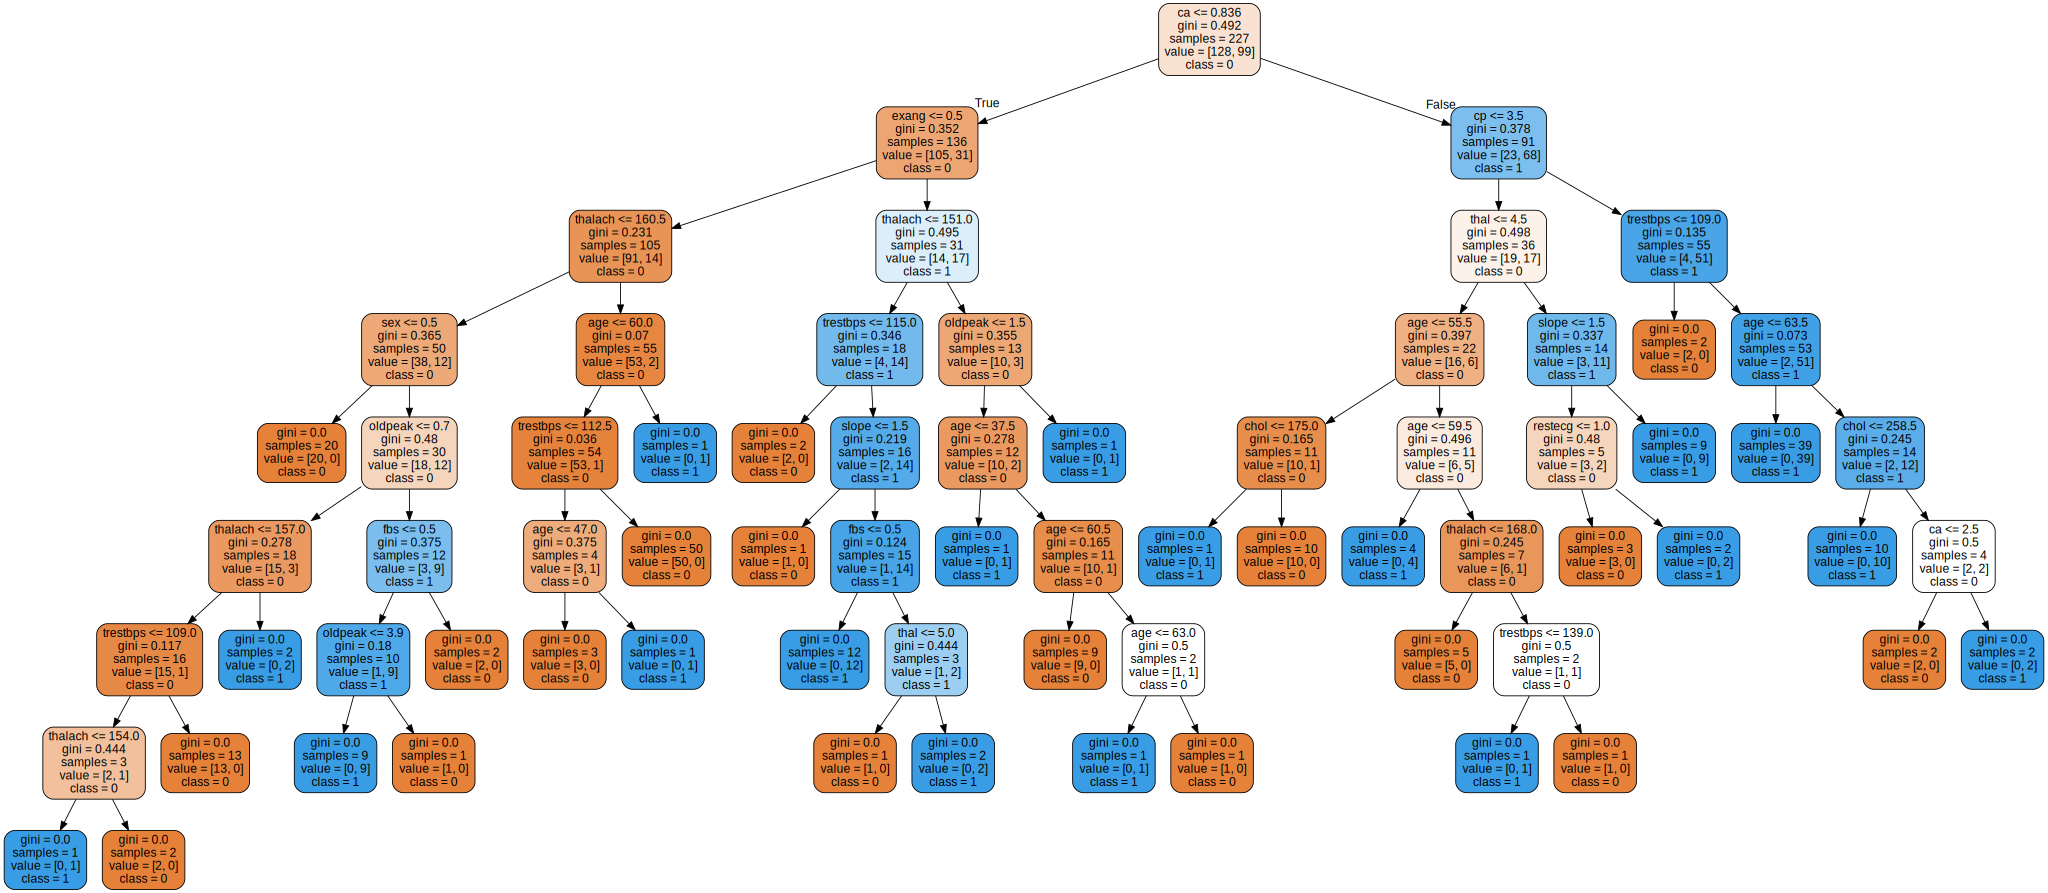

In [31]:
plot_data = export_graphviz(gridcv.best_estimator_,
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=data.columns[:-1],
                            class_names=['0', '1'])

graph = graphviz.Source(plot_data)
graph

## Bagged decision trees
* Bagging classifier ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html))

In [32]:
clf = DecisionTreeClassifier()

## Random forest classifier
* Random forest ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html))

In [33]:
rf_clf = RandomForestClassifier(random_state=42)

rf_params = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [3, 6, 9, None],    # Maximum depth of the tree
    'min_samples_split': [2, 5, 10]  # Minimum number of samples required to split an internal node
}

rf_gridcv = GridSearchCV(rf_clf, rf_params, scoring='accuracy', cv=5)
rf_gridcv.fit(X_train, y_train)

best_rf_model = rf_gridcv.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)
rf_f1 = f1_score(y_test, y_pred_rf, average='macro')
rf_accuracy = accuracy_score(y_test, y_pred_rf)

print("Best Random Forest Model:")
print(best_rf_model)
print(f"\nRandom Forest f1_macro score on test set: {rf_f1:.4f}")
print(f"Random Forest accuracy score on test set: {rf_accuracy:.4f}")

Best Random Forest Model:
RandomForestClassifier(max_depth=3, random_state=42)

Random Forest f1_macro score on test set: 0.8420
Random Forest accuracy score on test set: 0.8421


#### Exercise
1. Study the hyperparameters of three models: [Decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [Bagged Decision Trees](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) and [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
2. For each model, use pipeline+grid search cross-validation across multiple hyperparameters to find the best model.
* Decision tree: choose at least 3 hyperparameters
* Bagged decision trees: choose at least 3 hyperparameters
* Random forest: choose at least 3 hyperparameters
3. For each model, compute the `f1_macro` and `accuracy` score on the test set.
* What is your best model?
* Plot the best tree model
* What hyperparameters did you choose? (explain in words, not in `sklearn's` parameter name)
* What are the best values of your hyperparameters?

In [34]:
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)

bagging_params = {
    'n_estimators': [10, 50, 100],  # Number of base estimators in the ensemble
    'max_samples': [0.5, 0.7, 1.0], # Number of samples to draw from X to train each base estimator
    'max_features': [0.5, 0.7, 1.0] # Number of features to draw from X to train each base estimator
}

bagging_gridcv = GridSearchCV(bagging_clf, bagging_params, scoring='accuracy', cv=5)
bagging_gridcv.fit(X_train, y_train)

best_bagging_model = bagging_gridcv.best_estimator_
y_pred_bagging = best_bagging_model.predict(X_test)
bagging_f1 = f1_score(y_test, y_pred_bagging, average='macro')
bagging_accuracy = accuracy_score(y_test, y_pred_bagging)

print("Best Bagging Model:")
print(best_bagging_model)
print(f"\nBagging f1_macro score on test set: {bagging_f1:.4f}")
print(f"Bagging accuracy score on test set: {bagging_accuracy:.4f}")

Best Bagging Model:
BaggingClassifier(estimator=DecisionTreeClassifier(), max_features=0.5,
                  max_samples=0.5, n_estimators=100, random_state=42)

Bagging f1_macro score on test set: 0.8157
Bagging accuracy score on test set: 0.8158
